# Plotting From Mother Cell Dataframe
-Data is extracted from all mothers in Processing notebook and stored as CSV, all plotting and mother only analysis is located here


-slope_df is also imported here to get the shift figure and switch characteristics figure, was also extracted in the Processing notebook

In [2]:
from pathlib import Path
from trackmatexml import TrackmateXML
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import re
from collections import defaultdict
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

# makes figures look better in Jupyter
sns.set_context('talk')
sns.set_style("ticks")
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
plot_output = '/Volumes/salmonella/users/madison/2024_DIMM_MultirepAnalysis/LineagePlotting/Final_Plots'
mothers_df = pd.read_csv(os.path.join(plot_output, 'mothers_df.csv'))
slope_df = pd.read_csv(os.path.join(plot_output, 'slope_df_final.csv'))
gfp_threshold = 1515.608
log_gfp_th = np.log(gfp_threshold)

In [21]:
mothers_df['GFP_Pos_Bool'] = mothers_df['GFP_median_intensity_processed_transformed']>log_gfp_th
mothers_df['GFP_Pos_Bool'] = mothers_df['GFP_Pos_Bool'].astype(int)
mothers_df

,Unnamed: 0,unique_ID,experiment,position,mother_cell,time,GFP_median_intensity_processed_transformed,TRITC_median_intensity_processed_transformed,feret_diameter_um,GFP_Pos_Bool
0,0,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,0,6.216606,8.661430,3.548309,0
1,1,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,5,6.217604,8.617453,2.225241,0
2,2,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,10,6.218600,8.594732,2.270352,0
3,3,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,15,6.221915,8.558551,2.270352,0
4,4,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,20,6.225878,8.588730,2.270352,0
...,...,...,...,...,...,...,...,...,...,...
55547,55547,20241028__XY29_crop7__Track_9,20241028,XY29_crop7,1,1060,8.258757,8.186093,3.649274,1
55548,55548,20241028__XY29_crop7__Track_9,20241028,XY29_crop7,1,1065,8.280447,8.178358,3.790119,1
55549,55549,20241028__XY29_crop7__Track_9,20241028,XY29_crop7,1,1070,8.293122,8.180695,3.790119,1
55550,55550,20241028__XY29_crop7__Track_9,20241028,XY29_crop7,1,1075,8.323194,8.172730,3.660833,1


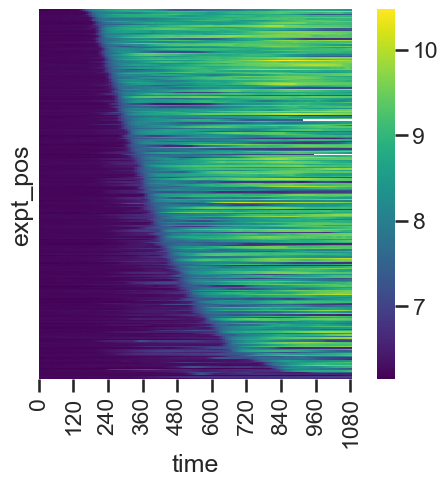

In [4]:
mothers_df['expt_pos']=mothers_df['experiment'].astype(str)+'_'+mothers_df['position']
pivot = mothers_df.pivot(index="expt_pos", columns="time", values="GFP_median_intensity_processed_transformed")
first_th_cross = pivot.apply(lambda row: row[row > log_gfp_th].index[0] if any(row > log_gfp_th) else float('inf'), axis=1)
# Sort the pivot table by the calculated values
GFP_TH_sorted_pivot = pivot.loc[first_th_cross.sort_values().index]
fig, ax = plt.subplots()
sns.heatmap(GFP_TH_sorted_pivot, cmap='viridis', ax=ax, square = True)

ax.tick_params(axis='y', which='both', length=0)

hour_ticks = [tick for tick in GFP_TH_sorted_pivot.columns if tick % 120 == 0]
hour_tick_indices = [GFP_TH_sorted_pivot.columns.get_loc(tick) for tick in hour_ticks]
ax.set_xticks(hour_tick_indices)
ax.set_yticks([])
ax.set_xticklabels(hour_ticks)
plt.savefig(plot_output +'/GFP_heatmap_THsorted.pdf',bbox_inches='tight', transparent=True)

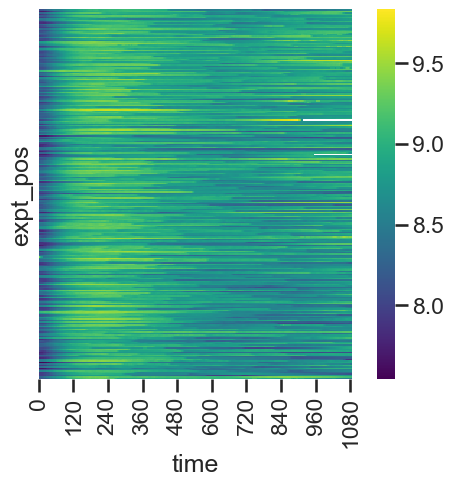

In [5]:
TRITC_pivot = mothers_df.pivot(index="expt_pos", columns="time", values="TRITC_median_intensity_processed_transformed")
TRITC_sorted_pivot = TRITC_pivot.reindex(GFP_TH_sorted_pivot.index)
fig, ax = plt.subplots()
sns.heatmap(TRITC_sorted_pivot, cmap='viridis', ax=ax, square = True)

ax.tick_params(axis='y', which='both', length=0)

hour_ticks = [tick for tick in TRITC_sorted_pivot.columns if tick % 120 == 0]
hour_tick_indices = [TRITC_sorted_pivot.columns.get_loc(tick) for tick in hour_ticks]
ax.set_xticks(hour_tick_indices)
ax.set_yticks([])
ax.set_xticklabels(hour_ticks)
plt.savefig(plot_output +'/Ruby_heatmap_GFPTHsorted.pdf',bbox_inches='tight', transparent=True)

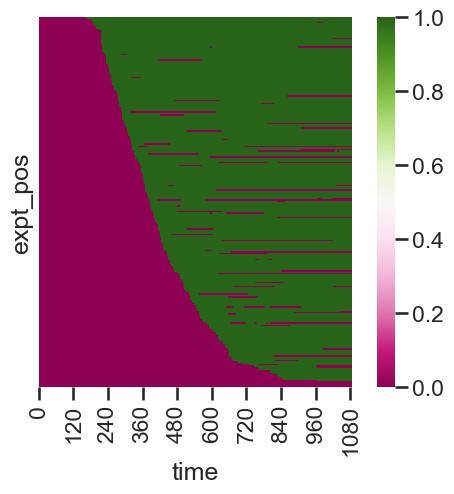

In [6]:
mothers_df['expt_pos']=mothers_df['experiment'].astype(str)+'_'+mothers_df['position']
binary_pivot = mothers_df.pivot(index="expt_pos", columns="time", values="GFP_Pos_Bool")
binary_sorted_pivot = binary_pivot.reindex(GFP_TH_sorted_pivot.index)
fig, ax = plt.subplots()
sns.heatmap(binary_sorted_pivot, cmap='PiYG', ax=ax, square = True)

ax.tick_params(axis='y', which='both', length=0)

hour_ticks = [tick for tick in GFP_TH_sorted_pivot.columns if tick % 120 == 0]
hour_tick_indices = [GFP_TH_sorted_pivot.columns.get_loc(tick) for tick in hour_ticks]
ax.set_xticks(hour_tick_indices)
ax.set_yticks([])
ax.set_xticklabels(hour_ticks)
plt.savefig(plot_output +'/GFPBinary_heatmap_THsorted.pdf',bbox_inches='tight', transparent=True)

In [7]:
all_switches_on = []
all_switches_off = []
mothers_grouped = mothers_df.groupby('unique_ID')
switch_on_times = []
switch_off_times = []
for unique_id, group in mothers_grouped:
    group = group.sort_values('time')  # Ensure time order

    shifted = group['GFP_Pos_Bool'].shift(1)
    switches_on = (shifted == False) & (group['GFP_Pos_Bool'] == True)
    times_on = group['time'][switches_on]
    switch_on_times.extend(times_on.tolist())
    switches_off = (shifted == True) & (group['GFP_Pos_Bool'] == False)
    times_off = group['time'][switches_on]
    switch_off_times.extend(times_off.tolist())

    sum_switches_on = switches_on.sum()
    sum_switches_off = switches_off.sum()

    print(f'unique ID: {unique_id}, switches_on: {sum_switches_on}, switches_off: {sum_switches_off}')

    all_switches_on.append(sum_switches_on)
    all_switches_off.append(sum_switches_off)

unique ID: 20240809__XY01_crop3__Track_5, switches_on: 2, switches_off: 1
unique ID: 20240809__XY02_crop1__Track_17, switches_on: 1, switches_off: 0
unique ID: 20240809__XY02_crop2__Track_20, switches_on: 1, switches_off: 0
unique ID: 20240809__XY02_crop3__Track_8, switches_on: 1, switches_off: 0
unique ID: 20240809__XY03_crop1__Track_61, switches_on: 1, switches_off: 0
unique ID: 20240809__XY03_crop2__Track_0, switches_on: 1, switches_off: 0
unique ID: 20240809__XY04_crop1__Track_14, switches_on: 1, switches_off: 0
unique ID: 20240809__XY04_crop2__Track_9, switches_on: 1, switches_off: 0
unique ID: 20240809__XY04_crop3__Track_3, switches_on: 2, switches_off: 1
unique ID: 20240809__XY05_crop1__Track_12, switches_on: 1, switches_off: 0
unique ID: 20240809__XY05_crop2__Track_18, switches_on: 2, switches_off: 2
unique ID: 20240809__XY05_crop3__Track_157, switches_on: 1, switches_off: 0
unique ID: 20240809__XY05_crop4__Track_12, switches_on: 2, switches_off: 1
unique ID: 20240809__XY07_cro

299
299


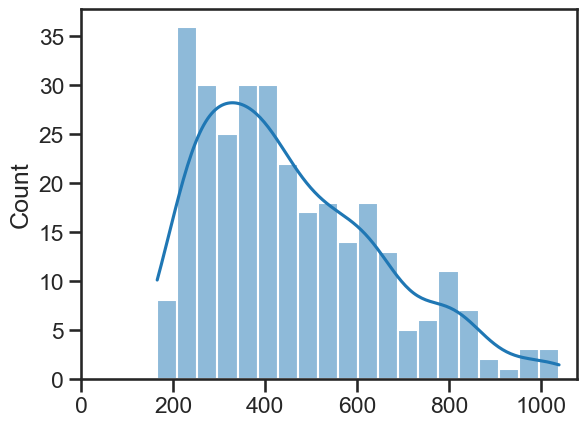

In [8]:
sns.histplot(x=switch_on_times, bins=20,
             kde=True) 
plt.xlim(0,1080)
print(len(switch_on_times))
print(sum(all_switches_on))

In [9]:
time_counts = mothers_df['GFP_Pos_Bool'].value_counts()
counts = time_counts.values
time_positive = counts[0]*5/60 #total time of all cells being positive in hours
time_negative = counts[1]*5/60 #total time of all cells being negative in hours

total_on_rate = sum(all_switches_on)/time_negative
total_off_rate = sum(all_switches_off)/time_positive

print(total_on_rate)
print(total_off_rate)

0.15206611570247933
0.027036330068529586


In [10]:
df_for_prob = mothers_df[mothers_df['time'] < 1080]
df_for_prob['Time_Bin'] = (df_for_prob['time'] // 60) * 60

# Sort for consistent group ordering
df_for_prob = df_for_prob.sort_values(by=['unique_ID', 'time'])

# For each unique_ID and each bin, get the first and last 'Bool' in that bin
first_in_bin = df_for_prob.groupby(['Time_Bin', 'unique_ID']).first().reset_index()
last_in_bin = df_for_prob.groupby(['Time_Bin', 'unique_ID']).last().reset_index()

start_off = first_in_bin[first_in_bin['GFP_Pos_Bool'] == False].groupby('Time_Bin')['unique_ID'].nunique().reset_index(name='Start_OFF')
start_on = first_in_bin[first_in_bin['GFP_Pos_Bool'] == True].groupby('Time_Bin')['unique_ID'].nunique().reset_index(name='Start_ON')
end_on = last_in_bin[last_in_bin['GFP_Pos_Bool'] == True].groupby('Time_Bin')['unique_ID'].nunique().reset_index(name='End_ON')

result = pd.merge(start_off, start_on, on='Time_Bin', how='outer')
result = pd.merge(result, end_on, on='Time_Bin', how='outer').fillna(0)
result['Start_OFF'] = result['Start_OFF'].astype(int)
result['End_ON'] = result['End_ON'].astype(int)
result['Start_ON'] = result['Start_ON'].astype(int)

result['Switch_Prob'] = (result['End_ON']-result['Start_ON']) / result['Start_OFF'].replace(0, np.nan)
result['Switch_Prob'] = result['Switch_Prob'].fillna(0)

# Sort by interval
result = result.sort_values('Time_Bin').reset_index(drop=True)
result['% Cells OFF'] = result['Start_OFF']/256*100
print(result)

    Time_Bin  Start_OFF  Start_ON  End_ON  Switch_Prob  % Cells OFF
0          0        256         0       0     0.000000   100.000000
1         60        256         0       0     0.000000   100.000000
2        120        256         0       1     0.003906   100.000000
3        180        254         2      32     0.118110    99.218750
4        240        222        34      73     0.175676    86.718750
5        300        181        75     106     0.171271    70.703125
6        360        145       111     143     0.220690    56.640625
7        420        110       146     169     0.209091    42.968750
8        480         88       168     189     0.238636    34.375000
9        540         66       190     204     0.212121    25.781250
10       600         49       207     219     0.244898    19.140625
11       660         33       223     225     0.060606    12.890625
12       720         30       226     227     0.033333    11.718750
13       780         28       228     231     0.

/var/folders/46/k335xc3d451dkz01yv9q72sc0000gr/T/ipykernel_64175/3710017493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_prob['Time_Bin'] = (df_for_prob['time'] // 60) * 60


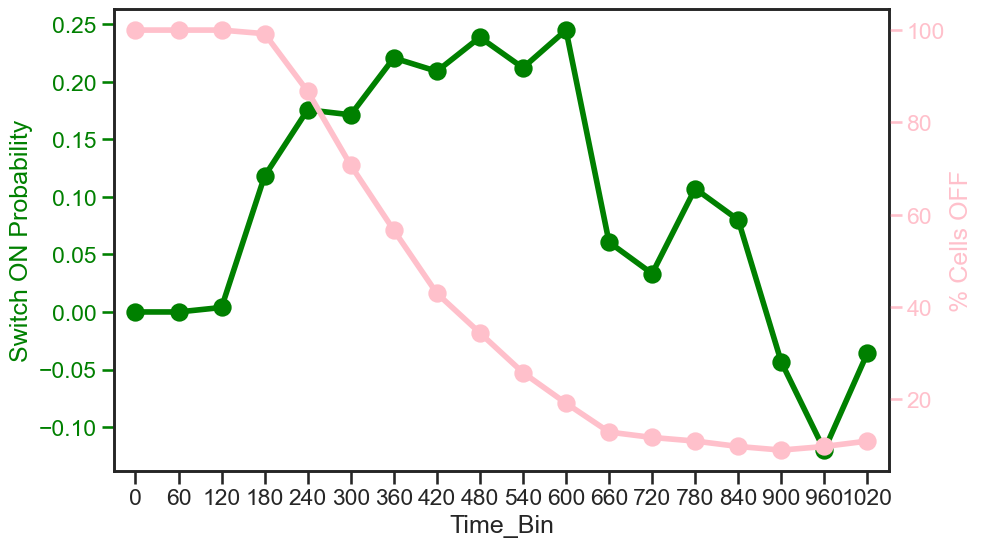

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 6))  
sns.pointplot(data=result, x='Time_Bin', y = 'Switch_Prob', ax=ax1, color='green')
ax1.set_ylabel('Switch ON Probability', color='green')
ax1.tick_params(axis='y', colors='green')
ax2 = ax1.twinx()
sns.pointplot(data=result, x='Time_Bin', y = '% Cells OFF', ax=ax2, color='pink')
ax2.set_ylabel('% Cells OFF', color='pink')
ax2.tick_params(axis='y', colors='pink')
fig.savefig(plot_output +'/probability_ON_switch.pdf',bbox_inches='tight', transparent=True)

In [19]:
mothers_df = mothers_df.rename(columns={'mother_cell': 'cell_id'})
# Merge shift values into the long-form dataframe
mothers_merged_df = mothers_df.merge(slope_df, on=['unique_ID', 'cell_id'], how='left')

# Drop rows that aren't switches
valid_shift_df = mothers_merged_df[mothers_merged_df['category']=='switch']
print("non-switch rows dropped:", len(mothers_merged_df[mothers_merged_df['category']!='switch']))

valid_shift_df['shifted_time'] = valid_shift_df['time'] - valid_shift_df['start_inc']

valid_shift_df = valid_shift_df[valid_shift_df['category']=='switch']

valid_shift_df

non-switch rows dropped: 4991


/var/folders/46/k335xc3d451dkz01yv9q72sc0000gr/T/ipykernel_64175/3744621064.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_shift_df['shifted_time'] = valid_shift_df['time'] - valid_shift_df['start_inc']


,Unnamed: 0_x,unique_ID,experiment_x,position_x,cell_id,time,GFP_median_intensity_processed_transformed,TRITC_median_intensity_processed_transformed,Area,feret_diameter,...,min_post_max,min_time_post_max,switch_like,becomes_positive,duration,magnitude_inc,category,long_enough_time,parent_start_inc,shifted_time
0,0,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,0,6.216606,8.661430,177.0,27.294687,...,8.220313,1060.0,True,True,100.0,1.876445,switch,True,NaN,-290.0
1,1,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,5,6.217604,8.617453,102.0,17.117243,...,8.220313,1060.0,True,True,100.0,1.876445,switch,True,NaN,-285.0
2,2,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,10,6.218600,8.594732,109.0,17.464249,...,8.220313,1060.0,True,True,100.0,1.876445,switch,True,NaN,-280.0
3,3,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,15,6.221915,8.558551,110.0,17.464249,...,8.220313,1060.0,True,True,100.0,1.876445,switch,True,NaN,-275.0
4,4,20240809__XY02_crop1__Track_17,20240809,XY02_crop1,1,20,6.225878,8.588730,112.0,17.464249,...,8.220313,1060.0,True,True,100.0,1.876445,switch,True,NaN,-270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55547,55547,20241028__XY29_crop7__Track_9,20241028,XY29_crop7,1,1060,8.258757,8.186093,172.0,28.071337,...,7.840165,795.0,True,True,140.0,2.046742,switch,True,NaN,770.0
55548,55548,20241028__XY29_crop7__Track_9,20241028,XY29_crop7,1,1065,8.280447,8.178358,180.0,29.154760,...,7.840165,795.0,True,True,140.0,2.046742,switch,True,NaN,775.0
55549,55549,20241028__XY29_crop7__Track_9,20241028,XY29_crop7,1,1070,8.293122,8.180695,184.0,29.154760,...,7.840165,795.0,True,True,140.0,2.046742,switch,True,NaN,780.0
55550,55550,20241028__XY29_crop7__Track_9,20241028,XY29_crop7,1,1075,8.323194,8.172730,177.0,28.160255,...,7.840165,795.0,True,True,140.0,2.046742,switch,True,NaN,785.0


/var/folders/46/k335xc3d451dkz01yv9q72sc0000gr/T/ipykernel_64175/2564668968.py:4: UserWarning: 
The palette list has fewer values (1) than needed (233) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=valid_shift_df, x='shifted_time', y='GFP_median_intensity_processed_transformed', hue='unique_ID', palette = grey_palette, legend=False, linewidth=1, alpha=0.1, ax=ax)


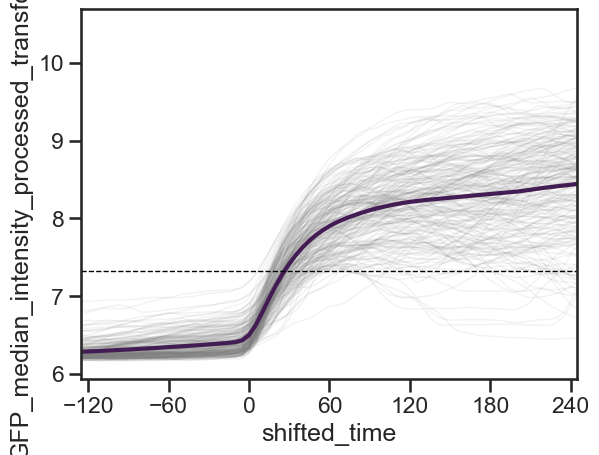

<Figure size 640x400 with 0 Axes>

In [16]:
grey_palette = ['#808080']
fig, ax = plt.subplots()
plt.figure(figsize=(6.4, 4))
sns.lineplot(data=valid_shift_df, x='shifted_time', y='GFP_median_intensity_processed_transformed', hue='unique_ID', palette = grey_palette, legend=False, linewidth=1, alpha=0.1, ax=ax)
sns.lineplot(data=valid_shift_df, x='shifted_time', y='GFP_median_intensity_processed_transformed', color='#431c54', linewidth=3, errorbar=None, ax=ax)
ax.axhline(y=log_gfp_th, color='black', linestyle='--', linewidth = 1)
desired_ticks = [-120, -60, 0, 60, 120, 180, 240] 
ax.set_xticks(desired_ticks)
ax.set_xlim(-125,245)
fig.savefig(plot_output +'/time_shifted_mother_traces.pdf',bbox_inches='tight', transparent=True)

/var/folders/46/k335xc3d451dkz01yv9q72sc0000gr/T/ipykernel_64767/3652608442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switches_only_mothers[column] = switches_only_mothers[column].astype(float)
/var/folders/46/k335xc3d451dkz01yv9q72sc0000gr/T/ipykernel_64767/3652608442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  switches_only_mothers[column] = switches_only_mothers[column].astype(float)
/var/folders/46/k335xc3d451dkz01yv9q72sc0000gr/T/ipykernel_64767/3652608442.py:6: SettingWithCopyWarning

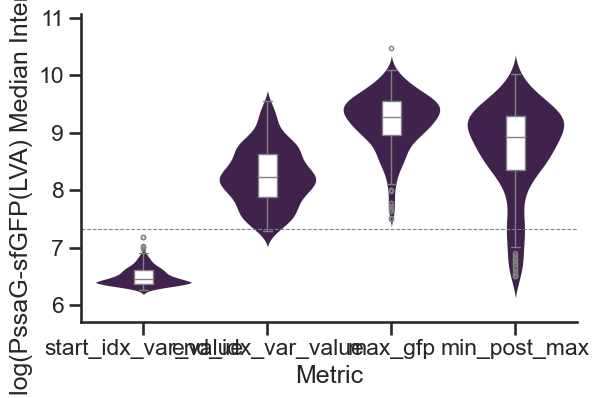

In [4]:
switches_only = slope_df[slope_df['category']=='switch']
switches_only_mothers = switches_only[switches_only['parent']==0]

columns_to_plot = ['start_idx_var_value', 'end_idx_var_value', 'max_gfp', 'min_post_max']
for column in columns_to_plot:
    switches_only_mothers[column] = switches_only_mothers[column].astype(float)
long_df = switches_only_mothers[columns_to_plot].melt(var_name='Metric', value_name='log(PssaG-sfGFP(LVA) Median Intensity)')
plt.figure(figsize=(6.4, 4))
sns.violinplot(x='Metric', y='log(PssaG-sfGFP(LVA) Median Intensity)', data=long_df, inner = None, fill=True, density_norm = 'width', color = '#431c54', alpha = 1, linecolor = 'white' )
sns.boxplot(x='Metric', y='log(PssaG-sfGFP(LVA) Median Intensity)', data=long_df, width = 0.15, color = 'white', linecolor ='grey',  fliersize = 3)
plt.axhline(y=log_gfp_th, color='grey', linestyle='--', linewidth = 0.75,)
sns.despine()
plt.savefig(plot_output +'/switch_features_GFP.pdf',bbox_inches='tight', transparent=True)


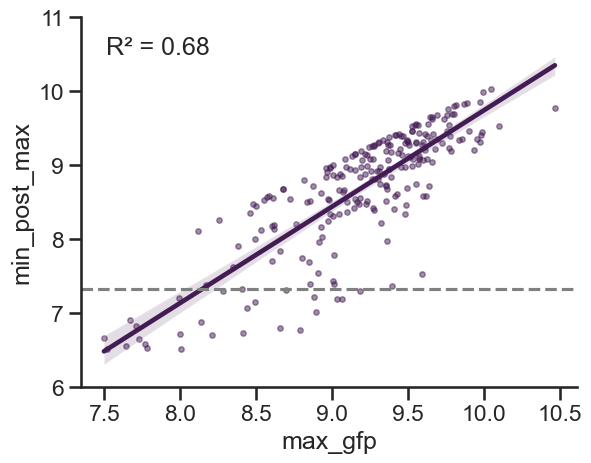

In [6]:
fig, ax = plt.subplots()
sns.regplot(data=switches_only_mothers, x='max_gfp', y = 'min_post_max', color='#431c54',scatter_kws = {'s':15, 'alpha':0.5}, ax=ax)
plt.axhline(y=log_gfp_th, color='grey', linestyle='--')
from sklearn.metrics import r2_score
x = switches_only['max_gfp']
y = switches_only['min_post_max']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_predicted = p(x)
r_squared = r2_score(y, y_predicted)
ax.annotate(f"R² = {r_squared:.2f}", xy=(0.05, 0.9), xycoords="axes fraction")

# Annotate the plot
sns.despine()
plt.ylim(6, 11)
plt.savefig(plot_output +'/maxvminpostmax_switches_mothers.pdf',bbox_inches='tight', transparent=True)

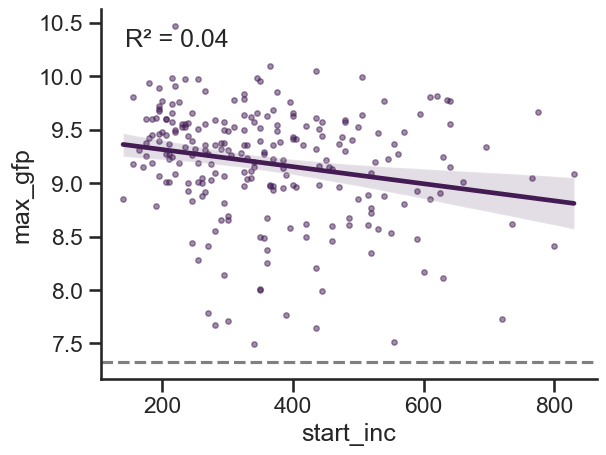

In [9]:
fig, ax = plt.subplots()
sns.regplot(data=switches_only_mothers, x='start_inc', y = 'max_gfp', color='#431c54',scatter_kws = {'s':15, 'alpha':0.5}, ax=ax)
x = switches_only['start_inc']
y = switches_only['max_gfp']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
y_predicted = p(x)
r_squared = r2_score(y, y_predicted)
ax.annotate(f"R² = {r_squared:.2f}", xy=(0.05, 0.9), xycoords="axes fraction")
plt.axhline(y=log_gfp_th, color='grey', linestyle='--')
sns.despine()

In [ ]:
mothers_slope['expt_pos'] = mothers_slope['experiment'].astype(str) + '_' + mothers_slope['position']

mothers_slope['cat_code'] = mothers_slope['category'].astype('category').cat.codes

# Create pivot table with one column, indexed by 'expt_pos'
pivot_table = mothers_slope.pivot_table(values='cat_code', index='expt_pos')

sorted_pivot = pivot_table.reindex(index=GFP_TH_sorted_pivot.index)
# Plot heatmap
fig, ax = plt.subplots(figsize=(2, len(sorted_pivot) * 0.25))  # Adjust height based on number of rows
sns.heatmap(sorted_pivot, annot=False, square=True, cmap='tab20b', cbar=False, ax=ax)

# Optional: show y-axis labels if desired
#ax.set_yticklabels(GFP_TH_sorted_pivot.index, rotation=0)
ax.set_xticks([])  # Keep x-axis empty since it's just one column
ax.set_xlabel('')
ax.set_ylabel('')
plt.title('Category Heatmap by expt_pos')
plt.tight_layout()


plt.savefig(plot_output+'/Mother_cell_category.pdf',bbox_inches='tight', transparent=True) 